In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle


2023-05-06 09:12:31.454749: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 09:12:31.504814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 09:12:31.505568: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 09:12:32.474493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values



In [3]:
kf = KFold(n_splits=5, shuffle=True)

model = RandomForestClassifier(n_estimators=25)

for train_index, test_index in kf.split(X):
    # Split test and train datasets4
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the model architecture

    # Train the model
    _ = model.fit(X_train, y_train)

Test accuracy: 0.966
              precision    recall  f1-score   support

           1       0.94      0.95      0.95       154
           2       0.96      0.95      0.95       161
           3       0.95      0.97      0.96       156
           4       0.97      0.95      0.96       152
           5       0.96      0.98      0.97       165
           6       1.00      1.00      1.00       168
           7       0.98      0.96      0.97       164

    accuracy                           0.97      1120
   macro avg       0.97      0.97      0.97      1120
weighted avg       0.97      0.97      0.97      1120



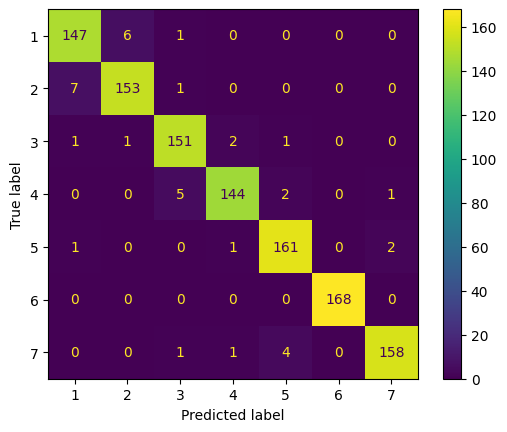

In [4]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

report = classification_report(y_test,y_pred)
print(report)

conf_mat = np.array(confusion_matrix(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()

In [5]:
accuracies = []

for n_estimators in range(1, 41):
    model = RandomForestClassifier(n_estimators=n_estimators)

    _ = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies += [n_estimators, accuracy],
    
accuracies = np.array(accuracies)

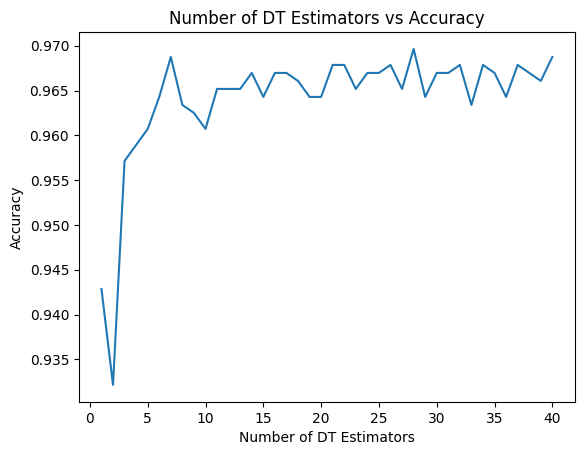

In [6]:
plt.title("Number of DT Estimators vs Accuracy")
plt.xlabel("Number of DT Estimators")
plt.ylabel("Accuracy")
plt.plot(*accuracies.T, label="Accuracy")
plt.show()


In [7]:
model_name = "random_forest_v2"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))